# Lab4

### Multivariate Linear and Polynomial Regression

## 1. Get the data

In [123]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_X = diabetes['data']
diabetes_y = diabetes['target']

In [124]:
import pandas as pd
df_diabetes_X = pd.DataFrame(diabetes_X, columns = diabetes['feature_names'])
df_diabetes_y = pd.DataFrame(diabetes_y)
df_diabetes_y.columns = ['target']
df_diabetes = pd.DataFrame(diabetes_X, columns = diabetes['feature_names'])
df_diabetes['target'] = df_diabetes_y

## 2. Frame the Problem

* Our goal is to build the best polynomial regression model that predicts the risk of diabetes progression based on BMI. We need to evaluate models based on R-squared, MAPE, and MAE metrices. After that, we will find the best fitted model and this model will serve as a tool for physicians to identify patients at higher risk of diabetes progrssion.

## 3. EDA - Describe the data, explore it, and provide insights about it. 

In [125]:
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


* all features have been standardized (especially sex is categorical value, but it already converted to numerical values). and also other variables already have been scaled.
* But only target variable is not scaled, which is actual observed values.
* Since features are already scaled, their ranges are a few standard deviations from the mean, maybe no extreme outliers exist in the features.

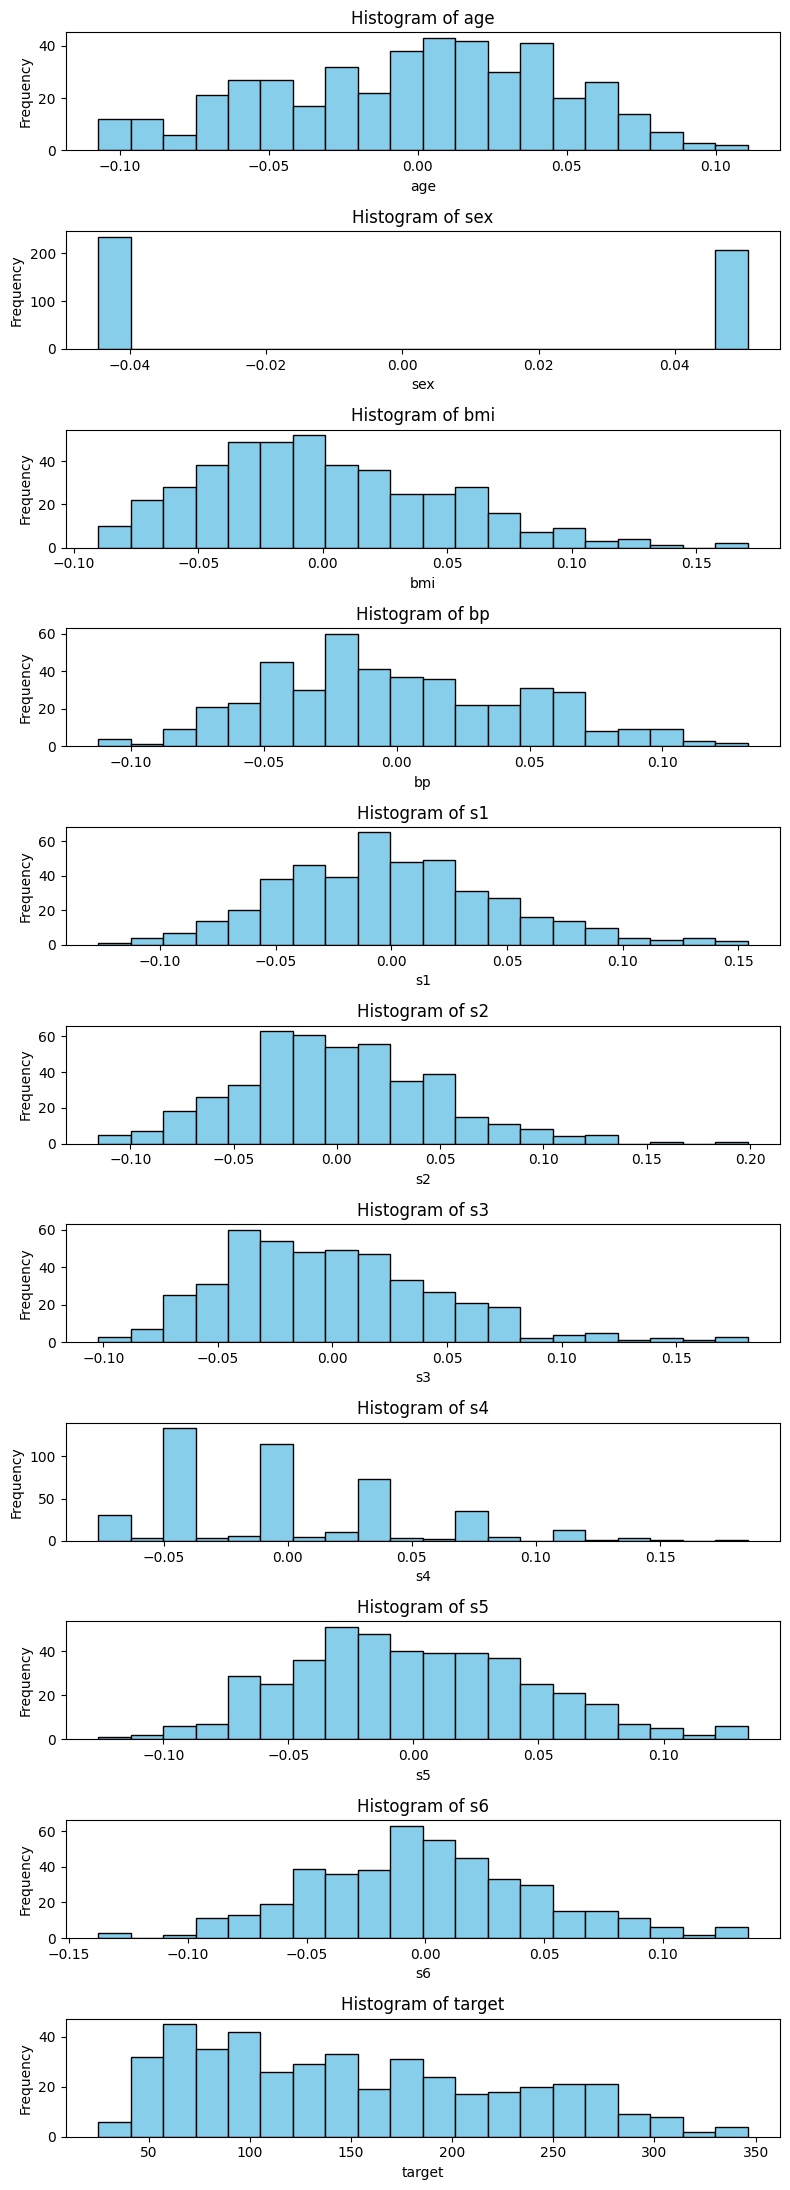

In [126]:
import matplotlib.pyplot as plt
import numpy as np

n_features = df_diabetes.shape[1]  
fig, ax = plt.subplots(n_features, 1, figsize=(8, n_features * 2)) 

for i, col in enumerate(df_diabetes.columns):
    ax[i].hist(df_diabetes[col], bins=20, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Histogram of {col}') 
    ax[i].set_xlabel(col)  
    ax[i].set_ylabel('Frequency')  

plt.tight_layout()
plt.show()

* sex feature is categorical(binary) as indicated by its histogram. 
* except s4, all features show normally distributed. 
* target variable shows slightly right-skewed distribution.

<Axes: >

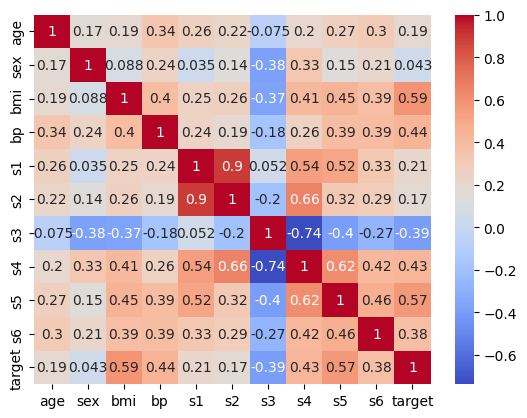

In [127]:
import seaborn as sns

corr = df_diabetes.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

* The correlation matrix shows how each variable relates to others, especially BMI has a relatively high positive correlation with the target(disease progrssion after one year), assuming that BMI can be a significant predictor for diabetes progrssion.
* Blood pressure and s4, s5 also show a moderate positive correlation with the target, which can indicate their importance in predicting diabetes progression.

## 4. Clean the data if needed, and explain the reason

In [128]:
print(df_diabetes.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


I do not need to clean the data because there is no null data and from the histogram there is no stand out outlier in the data.

## 5. Split the dataset to a train (70%), validation (15%) and test (15%) sets

In [129]:
train_size = int(len(df_diabetes) * 0.7)
train = df_diabetes[:train_size]
test = df_diabetes[train_size:]
valid_size = int(len(test)*0.5)
validation = test[:valid_size]
test = test[valid_size:]

## 6. Run a polynomial regression on the BMI feature versus the "disease progression one year after baseline" -from degree 0 to 5

In [130]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model0 = Pipeline([('polynomial', PolynomialFeatures(degree=0)), 
                  ('linear', LinearRegression())])
model0.fit(X=df_diabetes[["bmi"]], y= df_diabetes[["target"]])

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=0)),
                ('linear', LinearRegression())])

In [131]:
model1 = Pipeline([('polynomial', PolynomialFeatures(degree=1)), 
                  ('linear', LinearRegression())])
model1.fit(X=df_diabetes[["bmi"]], y= df_diabetes[["target"]])

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression())])

In [132]:
model2 = Pipeline([('polynomial', PolynomialFeatures(degree=2)), 
                  ('linear', LinearRegression())])
model2.fit(X=df_diabetes[["bmi"]], y= df_diabetes[["target"]])

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('linear', LinearRegression())])

In [133]:
model3 = Pipeline([('polynomial', PolynomialFeatures(degree=3)), 
                  ('linear', LinearRegression())])
model3.fit(X=df_diabetes[["bmi"]], y= df_diabetes[["target"]])

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

In [134]:
model4 = Pipeline([('polynomial', PolynomialFeatures(degree=4)), 
                  ('linear', LinearRegression())])
model4.fit(X=df_diabetes[["bmi"]], y= df_diabetes[["target"]])

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=4)),
                ('linear', LinearRegression())])

In [135]:
model5 = Pipeline([('polynomial', PolynomialFeatures(degree=5)), 
                  ('linear', LinearRegression())])
model5.fit(X=df_diabetes[["bmi"]], y= df_diabetes[["target"]])

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=5)),
                ('linear', LinearRegression())])

## 7. Compare the six models using the training and validation data

### 1) Report R-squared, MAPE and MAE.

In [136]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error

print("model degree 0")
print("Train set")
print(f"R-squared: {r2_score(train[['target']], model0.predict(train[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(train[['target']], model0.predict(train[['bmi']]))}")
print(f"MAE: {mean_absolute_error(train[['target']], model0.predict(train[['bmi']]))}")
print("\nValidation set")
print(f"R-squared: {r2_score(validation[['target']], model0.predict(validation[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(validation[['target']], model0.predict(validation[['bmi']]))}")
print(f"MAE: {mean_absolute_error(validation[['target']], model0.predict(validation[['bmi']]))}")

print("\nmodel degree 1")
print("Train set")
print(f"R-squared: {r2_score(train[['target']], model1.predict(train[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(train[['target']], model1.predict(train[['bmi']]))}")
print(f"MAE: {mean_absolute_error(train[['target']], model1.predict(train[['bmi']]))}")
print("\nValidation set")
print(f"R-squared: {r2_score(validation[['target']], model1.predict(validation[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(validation[['target']], model1.predict(validation[['bmi']]))}")
print(f"MAE: {mean_absolute_error(validation[['target']], model1.predict(validation[['bmi']]))}")

print("\nmodel degree 2")
print("Train set")
print(f"R-squared: {r2_score(train[['target']], model2.predict(train[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(train[['target']], model2.predict(train[['bmi']]))}")
print(f"MAE: {mean_absolute_error(train[['target']], model2.predict(train[['bmi']]))}")
print("\nValidation set")
print(f"R-squared: {r2_score(validation[['target']], model2.predict(validation[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(validation[['target']], model2.predict(validation[['bmi']]))}")
print(f"MAE: {mean_absolute_error(validation[['target']], model2.predict(validation[['bmi']]))}")

print("\nmodel degree 3")
print("Train set")
print(f"R-squared: {r2_score(train[['target']], model3.predict(train[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(train[['target']], model3.predict(train[['bmi']]))}")
print(f"MAE: {mean_absolute_error(train[['target']], model3.predict(train[['bmi']]))}")
print("\nValidation set")
print(f"R-squared: {r2_score(validation[['target']], model3.predict(validation[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(validation[['target']], model3.predict(validation[['bmi']]))}")
print(f"MAE: {mean_absolute_error(validation[['target']], model3.predict(validation[['bmi']]))}")

print("\nmodel degree 4")
print("Train set")
print(f"R-squared: {r2_score(train[['target']], model4.predict(train[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(train[['target']], model4.predict(train[['bmi']]))}")
print(f"MAE: {mean_absolute_error(train[['target']], model4.predict(train[['bmi']]))}")
print("\nValidation set")
print(f"R-squared: {r2_score(validation[['target']], model4.predict(validation[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(validation[['target']], model4.predict(validation[['bmi']]))}")
print(f"MAE: {mean_absolute_error(validation[['target']], model4.predict(validation[['bmi']]))}")

print("\nmodel degree 5")
print("Train set")
print(f"R-squared: {r2_score(train[['target']], model5.predict(train[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(train[['target']], model5.predict(train[['bmi']]))}")
print(f"MAE: {mean_absolute_error(train[['target']], model5.predict(train[['bmi']]))}")
print("\nValidation set")
print(f"R-squared: {r2_score(validation[['target']], model5.predict(validation[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(validation[['target']], model5.predict(validation[['bmi']]))}")
print(f"MAE: {mean_absolute_error(validation[['target']], model5.predict(validation[['bmi']]))}")

model degree 0
Train set
R-squared: -0.0011313587846994988
MAPE: 0.6417545465969174
MAE: 66.03972089209097

Validation set
R-squared: -0.050631243929606606
MAPE: 0.44933894972332356
MAE: 62.03736459618813

model degree 1
Train set
R-squared: 0.3388295790815973
MAPE: 0.49359723863087224
MAE: 52.37135634240279

Validation set
R-squared: 0.3215020210069508
MAPE: 0.3476891248826552
MAE: 48.61609259758876

model degree 2
Train set
R-squared: 0.340098566851432
MAPE: 0.493030139234905
MAE: 52.30493364742993

Validation set
R-squared: 0.31626874193968935
MAPE: 0.34798266387150556
MAE: 48.77029263535671

model degree 3
Train set
R-squared: 0.3409426441476806
MAPE: 0.4903790702881613
MAE: 52.13174894984336

Validation set
R-squared: 0.3234231445185868
MAPE: 0.3443993717871082
MAE: 48.24728649249733

model degree 4
Train set
R-squared: 0.3419498272438488
MAPE: 0.4890200126289871
MAE: 52.02370436862473

Validation set
R-squared: 0.31817913311085366
MAPE: 0.3440270615249618
MAE: 48.46693486292866



### 2) Conclusion: Choose the best model and explain your reasoning quantitively.

I will choose the model1 (degree 1). When choosing the best model among polunomial regression models of degree 0 to 5, we should consider a balance between complexity and predictive power to avoid overfitting. 

degree 0 model is inadequate since it has a negative R-square value, and also it has the highest errors (MAPE and MAE).

<b>degree 1 model (best)</b> shows a significant improvement compared to degree 0 model. The errors are lower than the degree 0 model.

degree 2 to degree 5 models show slightly higher R-squared values on both sets compared to degree 1 model, which means that it has slightly improvements. The errors decrease slightly within the increasing degree of the polynomial, but the improvements are minimal.

We all know that the degree 5 model is the best performance model since it has the highest R-squared value on the validation set, and also has the lowest errors on the validation set, indicating it makes predictions closer to the actual values. 

However, it is important to be careful of overfitting. while the degree 5 model is the best performance model, the improvement over the degree 1 model is not very large. and the increased risk of overfitting with higher-degree polnomials, the degree1 model can be considered as the best model due to its simplicity and reasonable peformance.

1. Run the chosen model on the test set, and report R-Squared, MSE and MAE for it.

In [185]:
print("\nbest model: degree 1")
print("Test set")
print(f"R-squared: {r2_score(test[['target']], model1.predict(test[['bmi']]))}")
print(f"MAPE: {mean_absolute_percentage_error(test[['target']], model1.predict(test[['bmi']]))}")
print(f"MAE: {mean_absolute_error(test[['target']], model1.predict(test[['bmi']]))}")


best model: degree 1
Test set
R-squared: 0.35354672085805494
MAPE: 0.5270023879314031
MAE: 52.29227157359036


2. Plot a graph of the train, validation and test datapoints, and the fit of the chosen model over each of them

In [138]:
train_X = pd.DataFrame(train, columns = diabetes['feature_names'])
validation_X = pd.DataFrame(validation, columns = diabetes['feature_names'])
test_X = pd.DataFrame(test, columns = diabetes['feature_names'])

In [192]:
def plot_model(X, y, model):
    # Calculate the number of rows and columns for the subplots
    X_continuous = np.linspace(min(X), max(X), 100).reshape(-1,1)
    fig, ax = plt.subplots()
    ax.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
    ax.plot(X_continuous, model.predict(X_continuous), label="Model", linewidth=2)
    ax.set_xlabel("BMI")
    ax.set_ylabel("target")
    plt.show()

c:\Users\dut08\Documents\conestoga\foundation\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


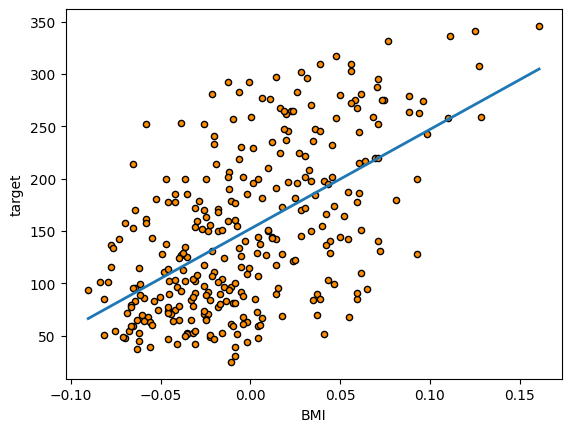

In [193]:
plot_model(train_X['bmi'], train['target'], model1)

c:\Users\dut08\Documents\conestoga\foundation\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


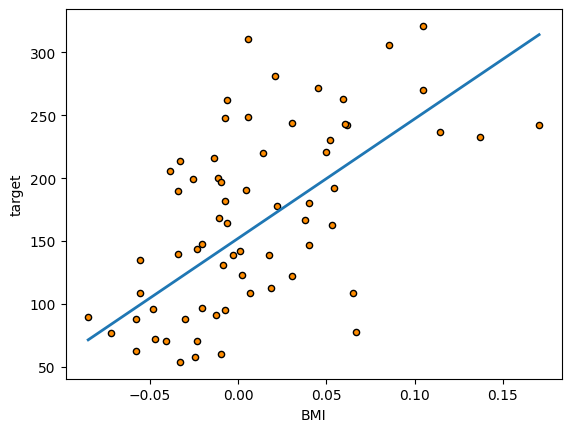

In [194]:
plot_model(validation_X['bmi'], validation['target'], model1)

c:\Users\dut08\Documents\conestoga\foundation\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


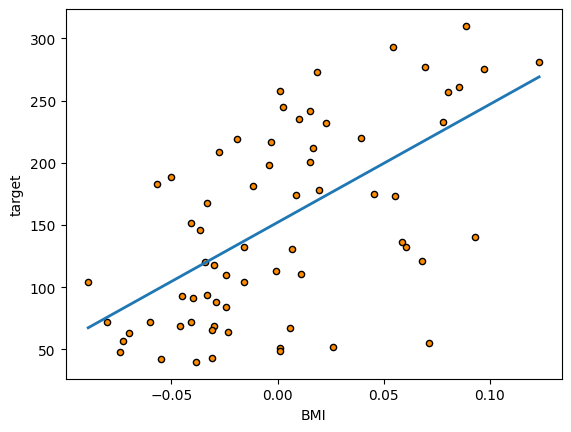

In [195]:
plot_model(test_X['bmi'], test['target'], model1)

### 3) Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient). Manually calculate the expected diabetes progression for a BMI value of your choice, and compare it to model.perdict() for that value 

In [145]:
def print_pipeline_model_stats(model):
    # print model    
    print(f'Model: {model}')
    print(f'Coefficients: {model[-1].coef_[0][1:]}')
    print(f'Intercept: {model[-1].intercept_[0]}')
    # generate equation string:
    equation = f"y = {model[-1].intercept_[0]:.2f}"
    for ind, coeff in enumerate(model[-1].coef_[0][1:]):
        degree = ind + 1
        equation += f" + {coeff:.2f}x^{degree}"
    print(f'Equation: {equation}')
    print('***')

In [189]:
print_pipeline_model_stats(model1)

Model: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression())])
Coefficients: [949.43526038]
Intercept: 152.13348416289617
Equation: y = 152.13 + 949.44x^1
***


In [190]:
chosen_bmi = 20
y_manual = model1[-1].intercept_[0] +  model1[-1].coef_[0][1:][0] * chosen_bmi 
print(y_manual)

19140.838691843685


In [191]:
y_predicted = model1.predict(np.array([[chosen_bmi]])).reshape(-1,1)
print(y_predicted)

[[19140.83869184]]


c:\Users\dut08\Documents\conestoga\foundation\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


They(manually calculated and predicted) are exactly same. 

## 3. How many trainable parameters are we fitting for each of the six models? Explain these values. One way is to use sklearn function

In [183]:
feature_names0 = model0[:-1].get_feature_names_out()
feature_names0

array(['1'], dtype=object)

* degree 0: it is a horizontal line. It only has just one parameter, which is the intercept.

In [182]:
feature_names1 = model1[:-1].get_feature_names_out()
feature_names1

array(['1', 'bmi'], dtype=object)

* degree 1: It has two parameters, one is intercept and another is coefficient of BMI. 

In [181]:
feature_names2 = model2[:-1].get_feature_names_out()
feature_names2

array(['1', 'bmi', 'bmi^2'], dtype=object)

* degree 2: It has three parameters, one is intercept and two are coefficients (one for BMI and one for BMI squared).

In [180]:
feature_names3 = model3[:-1].get_feature_names_out()
feature_names3

array(['1', 'bmi', 'bmi^2', 'bmi^3'], dtype=object)

* degree 3: It has four parameters, one is intercept and three are coefficients (one for BMI, one for BMI squared, and one for BMI cubed).

In [178]:
feature_names4 = model4[:-1].get_feature_names_out()
feature_names4

array(['1', 'bmi', 'bmi^2', 'bmi^3', 'bmi^4'], dtype=object)

* degree 4: It has five parameters, one is intercept and three are coefficients (one for BMI, one for BMI squared, one for BMI cubed, and one for BMI to the power of four).

In [179]:
feature_names5 = model5[:-1].get_feature_names_out()
feature_names5

array(['1', 'bmi', 'bmi^2', 'bmi^3', 'bmi^4', 'bmi^5'], dtype=object)

* degree 5: It has six parameters, one is intercept and three are coefficients (one for BMI, one for BMI squared, one for BMI cubed, one for BMI to the power of four, and one for BMI to the power of five).